<a href="https://colab.research.google.com/github/HansHenseler/masdav2023/blob/main/Part_7_Email_analytics_and_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing and visualising emails

Part 7

Master of Advanced Studies in Digital Forensics & Cyber Investigation

Data Analytics and Visualization for Digital Forensics

(c) Hans Henseler, 2023

# Part 7

## 1 Importing python libs

In [ ]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.__version__

'1.3.5'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 2 Read the Excel file containing Enron headers

Let's read the excel file containing headers of Enron emails

In [ ]:
df = pd.read_excel( "/content/gdrive/MyDrive/Testdata/EnronEmails.xlsx" )
df

,DocID,From,Recipients,Cc,Date,Subject,CustodianName,Location,Day
0,175231,m..presto@enron.com<m..presto@enron.com>,tim.belden@enron.com <tim.belden@enron.com>,NaN,2001-10-16 21:28:28,Son Onofre,presto-k,sent_items,1749
1,232669,magdelena.cruz@enron.com<magdelena.cruz@enron....,e.taylor@enron.com <e.taylor@enron.com>,NaN,2001-07-12 18:23:41,FW: DB# User Feedback,taylor-m,inbox\passwords,1653
2,178812,becky.pitre@enron.com<becky.pitre@enron.com>,richard.ring@enron.com <richard.ring@enron.com>,NaN,2001-10-23 22:26:39,FW: Termination Proceedings,ring-r,inbox,1756
3,5834,eric.bass@enron.com<eric.bass@enron.com>,shanna.husser@enron.com <shanna.husser@enron.c...,NaN,2000-08-07 13:51:00,Austin?,bass-e,_sent_mail,1314
4,187302,cara.semperger@enron.com<cara.semperger@enron....,shift.portland@enron.com <shift.portland@enron...,NaN,2001-06-23 01:05:41,IDAHO HAS A NEW NERC ACRONYM,salisbury-h,inbox,1634
...,...,...,...,...,...,...,...,...,...
252960,4869,joanne.rozycki@enron.com<joanne.rozycki@enron....,susan.bailey@enron.com <susan.bailey@enron.com>,NaN,2002-01-24 17:06:32,Gerald Nemec is out of office thru Monday,bailey-s,deleted_items,1849
252961,215514,matt.smith@enron.com<matt.smith@enron.com>,asalazar@pirnie.com <asalazar@pirnie.com>,NaN,2001-02-28 17:08:00,RE:,smith-m,_sent_mail,1519
252962,219842,d..steffes@enron.com<d..steffes@enron.com>,c..williams@enron.com <c..williams@enron.com>;...,wanda.curry@enron.com <wanda.curry@enron.com>;...,2001-10-10 23:18:22,RE: SCE Late Charges,steffes-j,sent_items,1743
252963,10820,sally.beck@enron.com<sally.beck@enron.com>,bob.hall@enron.com <bob.hall@enron.com>,NaN,2001-01-17 09:21:00,Re: Good Morning.,beck-s,_sent_mail,1477


In [ ]:
df.shape

(252965, 9)

## 2 Replace missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252965 entries, 0 to 252964
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DocID          252965 non-null  int64         
 1   From           252965 non-null  object        
 2   Recipients     243682 non-null  object        
 3   Cc             59630 non-null   object        
 4   Date           252965 non-null  datetime64[ns]
 5   Subject        244260 non-null  object        
 6   CustodianName  252965 non-null  object        
 7   Location       252957 non-null  object        
 8   Day            252965 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 17.4+ MB


We have values that are Null. Let's replace these with empty string

In [ ]:
df=df.fillna("")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252965 entries, 0 to 252964
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DocID          252965 non-null  int64         
 1   From           252965 non-null  object        
 2   Recipients     252965 non-null  object        
 3   Cc             252965 non-null  object        
 4   Date           252965 non-null  datetime64[ns]
 5   Subject        252965 non-null  object        
 6   CustodianName  252965 non-null  object        
 7   Location       252965 non-null  object        
 8   Day            252965 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 17.4+ MB


## 3 List custodians and number of emails per custodian

Example: how many emails for custodian beck-s?

In [ ]:
df[df.CustodianName=="beck-s"].shape[0]

4833

In [ ]:
# We add a column count for each row and set it to 1 which makes it easier to pivot
df['Count']=1

custodians = pd.pivot_table(df,index=[df.CustodianName],values='Count', aggfunc="count")
custodians

,Count
CustodianName,
allen-p,1396
arnold-j,2591
arora-h,471
badeer-r,324
bailey-s,453
...,...
williams-w3,3229
wolfe-j,780
ybarbo-p,844


In [ ]:
# note: we could have counted the number of records for each custodian also using value_counts:

df["CustodianName"].value_counts()

dasovich-j      15776
kaminski-v      11228
jones-t         10148
shackleton-s     9236
mann-k           7461
                ...  
slinger-r         121
solberg-g          87
south-s            57
phanis-s           26
merriss-s          14
Name: CustodianName, Length: 150, dtype: int64

## 4 Filter email subjects on keyword

Select all emails that have the word blockbuster or enron in the subject

In [ ]:
df[df['Subject'].str.contains("[bB]lockbuster|[eE]nron",na=False)].shape[0]

11473

## 5 Create a timeline of email count between 1-1-1999 and 1-1-2002

Create a histogram showing the number of emails per week

In [ ]:
# Use the Date column as index

df.set_index(['Date'],inplace=True)
df.index
df

,DocID,From,Recipients,Cc,Subject,CustodianName,Location,Day,Count
Date,,,,,,,,,
2001-10-16 21:28:28,175231,m..presto@enron.com<m..presto@enron.com>,tim.belden@enron.com <tim.belden@enron.com>,,Son Onofre,presto-k,sent_items,1749,1
2001-07-12 18:23:41,232669,magdelena.cruz@enron.com<magdelena.cruz@enron....,e.taylor@enron.com <e.taylor@enron.com>,,FW: DB# User Feedback,taylor-m,inbox\passwords,1653,1
2001-10-23 22:26:39,178812,becky.pitre@enron.com<becky.pitre@enron.com>,richard.ring@enron.com <richard.ring@enron.com>,,FW: Termination Proceedings,ring-r,inbox,1756,1
2000-08-07 13:51:00,5834,eric.bass@enron.com<eric.bass@enron.com>,shanna.husser@enron.com <shanna.husser@enron.c...,,Austin?,bass-e,_sent_mail,1314,1
2001-06-23 01:05:41,187302,cara.semperger@enron.com<cara.semperger@enron....,shift.portland@enron.com <shift.portland@enron...,,IDAHO HAS A NEW NERC ACRONYM,salisbury-h,inbox,1634,1
...,...,...,...,...,...,...,...,...,...
2002-01-24 17:06:32,4869,joanne.rozycki@enron.com<joanne.rozycki@enron....,susan.bailey@enron.com <susan.bailey@enron.com>,,Gerald Nemec is out of office thru Monday,bailey-s,deleted_items,1849,1
2001-02-28 17:08:00,215514,matt.smith@enron.com<matt.smith@enron.com>,asalazar@pirnie.com <asalazar@pirnie.com>,,RE:,smith-m,_sent_mail,1519,1
2001-10-10 23:18:22,219842,d..steffes@enron.com<d..steffes@enron.com>,c..williams@enron.com <c..williams@enron.com>;...,wanda.curry@enron.com <wanda.curry@enron.com>;...,RE: SCE Late Charges,steffes-j,sent_items,1743,1


In [ ]:
import datetime



# we clean up the dates and leave out anything before 1-1-1999 or after 1-1-2002

clean_df = df[(df.index.date > datetime.date(1999,1,1)) & (df.index.date < datetime.date(2002,1,1))]

emails_per_day = pd.pivot_table( clean_df , values="Count",index=[clean_df.index.date], aggfunc="count")
emails_per_day

,Count
1999-01-04,2
1999-01-05,3
1999-01-06,3
1999-01-07,3
1999-01-08,4
...,...
2001-12-27,531
2001-12-28,507
2001-12-29,186
2001-12-30,131


Let's plot this selection

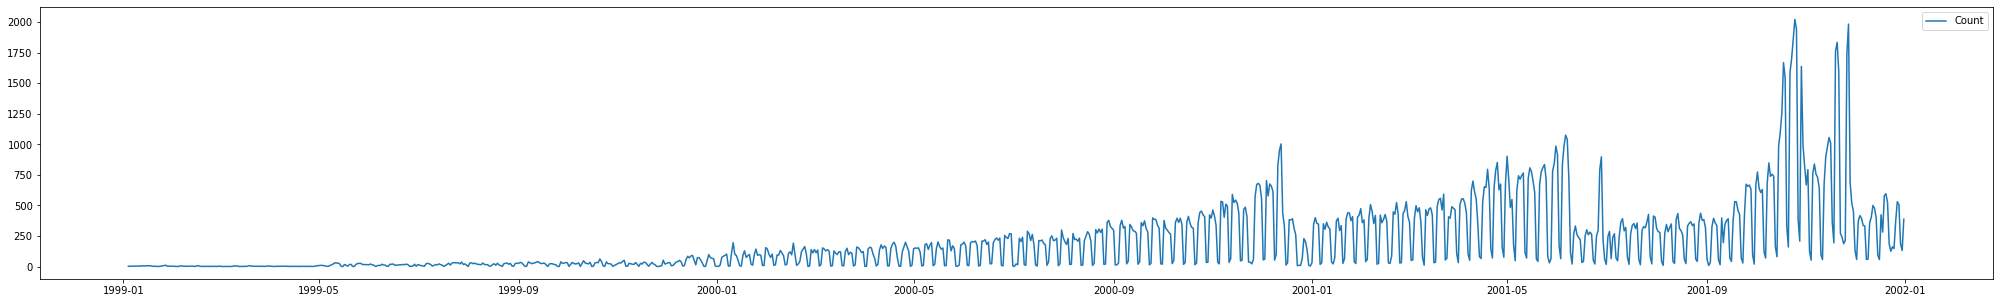

In [ ]:
emails_per_day.plot(kind='line',y='Count',figsize=(35,5))

## 6 Network visualisation

In [ ]:
import networkx as nx


# note that your file doesn't have column names
# passing `names` to label the columns

relations = pd.read_excel('/content/gdrive/MyDrive/Testdata/Relations.xlsx')
relations



,From,To_Cc,CountOfDocId
0,1,1,2
1,1,2,33
2,1,26,5
3,1,28,8
4,1,29,15
...,...,...,...
357044,84618,13581,1
357045,84619,27426,1
357046,84621,581,1
357047,84622,581,1


In [ ]:
addresses = pd.read_excel('/content/gdrive/MyDrive/Testdata/Addresses.xlsx')
addresses

,AddressId,Count,Address,CustodianID
0,1,2185,m..presto@enron.com,NaN
1,2,3446,tim.belden@enron.com,NaN
2,3,41,magdelena.cruz@enron.com,NaN
3,4,585,e.taylor@enron.com,NaN
4,5,76,becky.pitre@enron.com,NaN
...,...,...,...,...
84624,84625,1,sellers'.'prentice@enron.com,NaN
84625,84626,1,sue_nord@enron.enron.net,NaN
84626,84627,1,ceg_ir-sec.um.a.2.105072@joinmail.ccbn.com,NaN
84627,84628,1,lmlovett@swidlaw.com,NaN


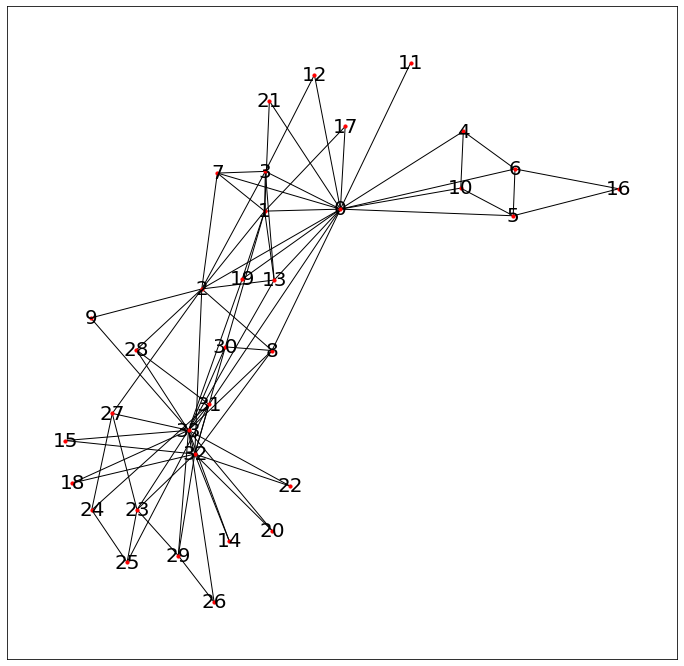

In [ ]:
# networkx has some sample datasets available. Here is the Karate Club dataset:
# see http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm#zachary

plt.figure(figsize=(12,12))
Gk = nx.karate_club_graph()
nx.draw_networkx(Gk,node_size=10,node_color='red',with_labels=True,font_size=20)

In [ ]:
# See https://networkx.org/documentation/stable/reference/convert.html
# only take a selection otherwise drawing will take too long

G = nx.from_pandas_edgelist(relations[357000:357048], source='From', target='To_Cc')


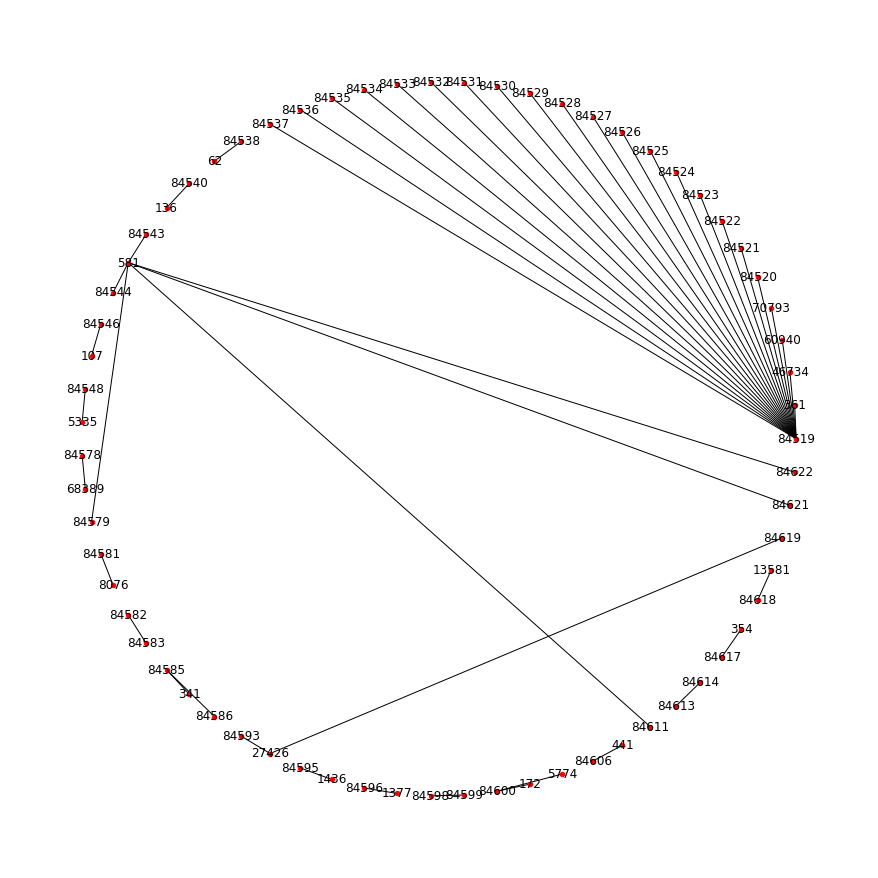

In [ ]:
plt.figure(figsize=(12,12))
#nx.draw_spring(G,node_size=20,node_color='red',with_labels=True,font_size=9)
nx.draw_circular(G,node_size=20,node_color='red',with_labels=True,font_size=12)
plt.show()

In [ ]:
# Centrality measures

degree = nx.algorithms.centrality.degree_centrality(G)
def top10(list):
    i = 0
    for w in sorted(list, key=list.get, reverse=True):
        print(w,'\t',degree[w])
        i+=1
        if i==10:
          break

top10(degree)

84519 	 0.33333333333333337
581 	 0.09090909090909091
84585 	 0.030303030303030304
27426 	 0.030303030303030304
84600 	 0.030303030303030304
361 	 0.015151515151515152
46734 	 0.015151515151515152
60940 	 0.015151515151515152
70793 	 0.015151515151515152
84520 	 0.015151515151515152


In [ ]:
betweenness = nx.algorithms.centrality.betweenness_centrality(G)
top10(betweenness)

{84519: 0.1076923076923077, 361: 0.0, 46734: 0.0, 60940: 0.0, 70793: 0.0, 84520: 0.0, 84521: 0.0, 84522: 0.0, 84523: 0.0, 84524: 0.0, 84525: 0.0, 84526: 0.0, 84527: 0.0, 84528: 0.0, 84529: 0.0, 84530: 0.0, 84531: 0.0, 84532: 0.0, 84533: 0.0, 84534: 0.0, 84535: 0.0, 84536: 0.0, 84537: 0.0, 84538: 0.0, 62: 0.0, 84540: 0.0, 136: 0.0, 84543: 0.0, 581: 0.006993006993006993, 84544: 0.0, 84546: 0.0, 107: 0.0, 84548: 0.0, 5335: 0.0, 84578: 0.0, 68389: 0.0, 84579: 0.0, 84581: 0.0, 8076: 0.0, 84582: 0.0, 84583: 0.0, 84585: 0.0004662004662004662, 341: 0.0, 84586: 0.0, 84593: 0.0, 27426: 0.0004662004662004662, 84595: 0.0, 1436: 0.0, 84596: 0.0, 1377: 0.0, 84598: 0.0, 84599: 0.0, 84600: 0.0004662004662004662, 172: 0.0, 5774: 0.0, 84606: 0.0, 441: 0.0, 84611: 0.0, 84613: 0.0, 84614: 0.0, 84617: 0.0, 354: 0.0, 84618: 0.0, 13581: 0.0, 84619: 0.0, 84621: 0.0, 84622: 0.0}


In [ ]:
eigenvector = nx.algorithms.centrality.eigenvector_centrality(G)
top10(eigenvector)

{84519: 0.7071106143746846, 361: 0.15075485504589356, 46734: 0.15075485504589356, 60940: 0.15075485504589356, 70793: 0.15075485504589356, 84520: 0.15075485504589356, 84521: 0.15075485504589356, 84522: 0.15075485504589356, 84523: 0.15075485504589356, 84524: 0.15075485504589356, 84525: 0.15075485504589356, 84526: 0.15075485504589356, 84527: 0.15075485504589356, 84528: 0.15075485504589356, 84529: 0.15075485504589356, 84530: 0.15075485504589356, 84531: 0.15075485504589356, 84532: 0.15075485504589356, 84533: 0.15075485504589356, 84534: 0.15075485504589356, 84535: 0.15075485504589356, 84536: 0.15075485504589356, 84537: 0.15075485504589356, 84538: 1.3623632600060183e-13, 62: 1.3623632600060183e-13, 84540: 1.3623632600060183e-13, 136: 1.3623632600060183e-13, 84543: 2.3632705349045521e-07, 581: 5.788806935001933e-07, 84544: 2.3632705349045521e-07, 84546: 1.3623632600060183e-13, 107: 1.3623632600060183e-13, 84548: 1.3623632600060183e-13, 5335: 1.3623632600060183e-13, 84578: 1.3623632600060183e-1

In [ ]:
closeness = nx.algorithms.centrality.closeness_centrality(G)
top10(closeness)

{84519: 0.3333333333333333, 361: 0.17054263565891473, 46734: 0.17054263565891473, 60940: 0.17054263565891473, 70793: 0.17054263565891473, 84520: 0.17054263565891473, 84521: 0.17054263565891473, 84522: 0.17054263565891473, 84523: 0.17054263565891473, 84524: 0.17054263565891473, 84525: 0.17054263565891473, 84526: 0.17054263565891473, 84527: 0.17054263565891473, 84528: 0.17054263565891473, 84529: 0.17054263565891473, 84530: 0.17054263565891473, 84531: 0.17054263565891473, 84532: 0.17054263565891473, 84533: 0.17054263565891473, 84534: 0.17054263565891473, 84535: 0.17054263565891473, 84536: 0.17054263565891473, 84537: 0.17054263565891473, 84538: 0.015151515151515152, 62: 0.015151515151515152, 84540: 0.015151515151515152, 136: 0.015151515151515152, 84543: 0.04958677685950413, 581: 0.09090909090909091, 84544: 0.04958677685950413, 84546: 0.015151515151515152, 107: 0.015151515151515152, 84548: 0.015151515151515152, 5335: 0.015151515151515152, 84578: 0.015151515151515152, 68389: 0.01515151515151

# Exercises

## 1 Heatmap showing number of emails per custodian per day from 1-1-1999 to 1-1-2002

In [ ]:
# Your answer

## 2 Create a treemap based on CustodianName and using number of emails per custodian as Size

In [ ]:
# Your answer

## 3 What is the most likely email address of a custodian?

In [ ]:
# Your answer

## 4 Create a wordcloud for email subject field contents for custodian beck-s

In [ ]:
# Your answer

## 5 Filter all rows where subject contains Azurix and display heatmap as in 1

In [ ]:
# Your answer

## 6 With filtered set from exercise 5 plot a histogram for %  of emails per year-week

In [ ]:
# Your answer

## 7 **Advanced** Select a subset of addresses

So that you get a connected graph that can be displayed in Colab with labels in a readable way

Calculate centrality and visually validate if it is (approximately) correct

In [ ]:
# Your answer